# НИРС по ТМО

Был взят [датасет для предсказывания успешности студента во время обучения](https://www.kaggle.com/competitions/playground-series-s4e6/data). Целевым признаком является категориальный признак "Target", который принимает значения dropout, enrolled, and graduate. Целью анализа и построения моделей является возможность предсказывать риски отчисления студентов, что возволит выделять больше ресурсов на студентов с отрицательными прогнозами.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, RepeatedKFold

sns.set_theme(style='whitegrid')
palette='viridis'

In [2]:
train_df = pd.read_csv("/train.csv")
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

## Разведочный анализ данных


Distribution of target variable 'Target':
Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64


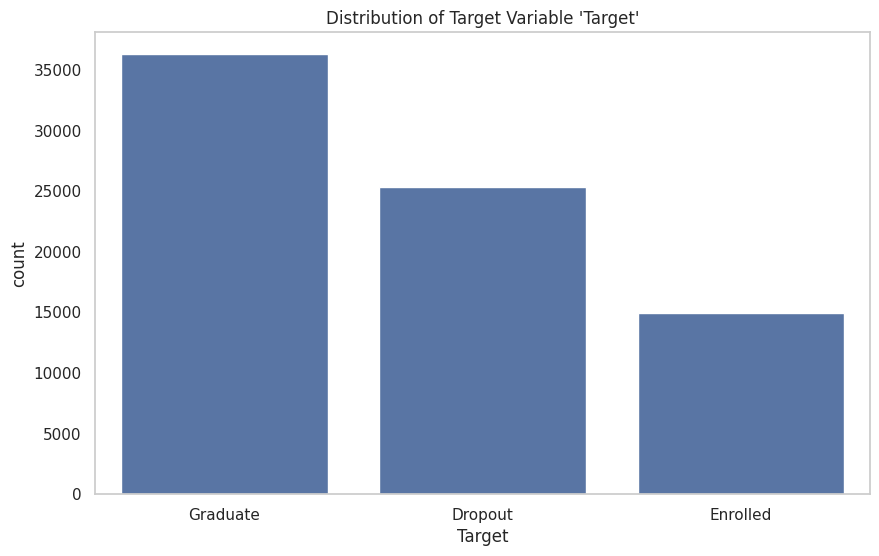

In [6]:
print("\nDistribution of target variable 'Target':")
print(train_df['Target'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Target')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

<ipython-input-7-30b3cef84dde>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['Previous qualification (grade)'], shade=True)


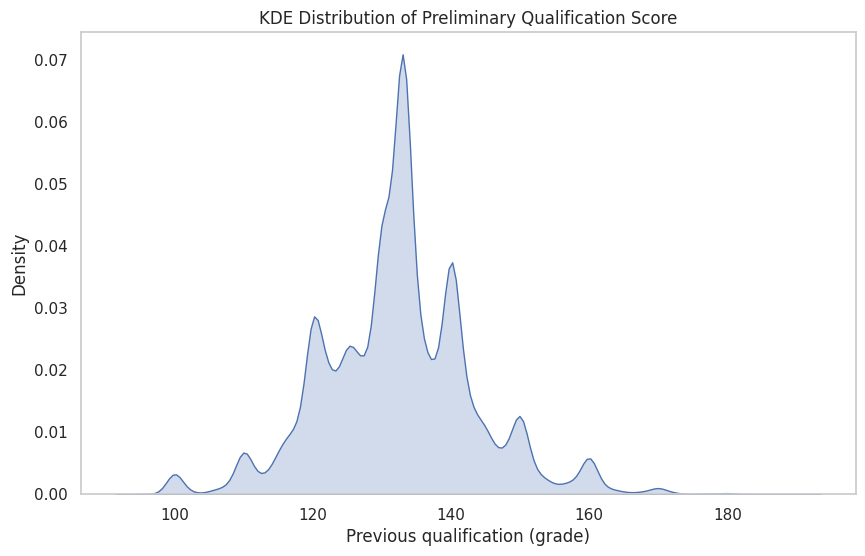

<ipython-input-7-30b3cef84dde>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['Curricular units 2nd sem (grade)'], shade=True)


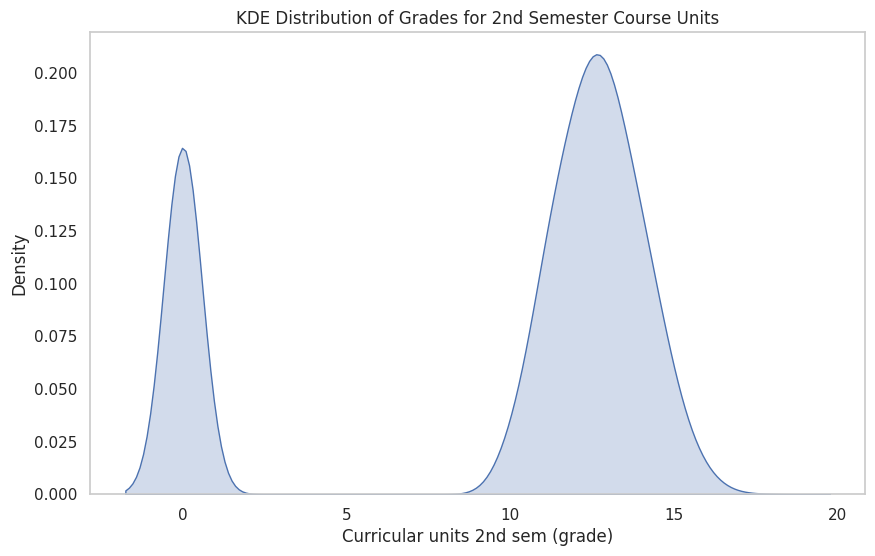

In [7]:
# Variables of interest
numerical_features = ['Previous qualification (grade)', 'Curricular units 2nd without (grade)',
 'Unemployment rate', 'Inflation rate', 'GDP']

# Categorical variables
categorical_features = ['Marital status', 'Application mode', 'Daytime/evening attendance',
 'Nationality', 'Mother\'s qualification']

# Variables of interest
numerical_features = ['age', 'income', 'gpa']

# Categorical variables and features
categorical_features = ['gender', 'major']

# 1. Distribution of Numerical Variables with KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Previous qualification (grade)'], shade=True)
plt.title('KDE Distribution of Preliminary Qualification Score')
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Curricular units 2nd sem (grade)'], shade=True)
plt.title('KDE Distribution of Grades for 2nd Semester Course Units')
plt.grid(False)
plt.show()

<ipython-input-8-e17cf1b4baf9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['Unemployment rate'], shade=True)


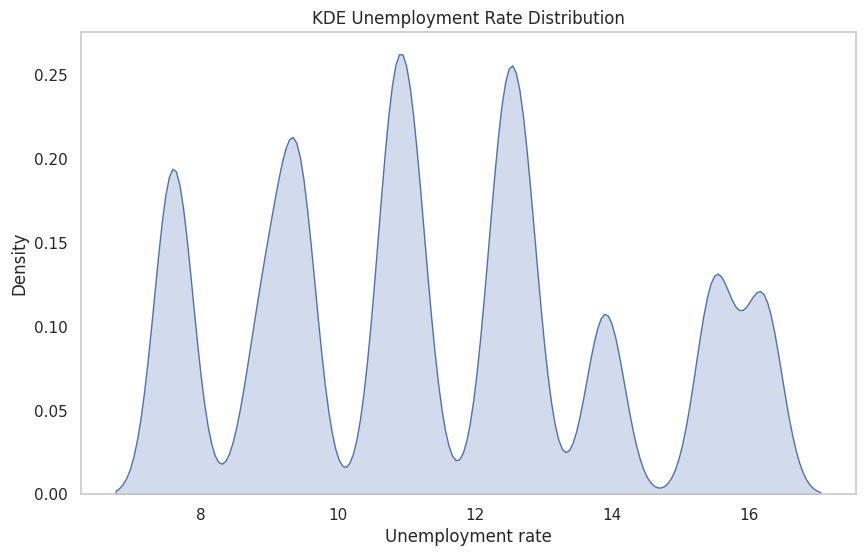

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Unemployment rate'], shade=True)
plt.title('KDE Unemployment Rate Distribution')
plt.grid(False)
plt.show()

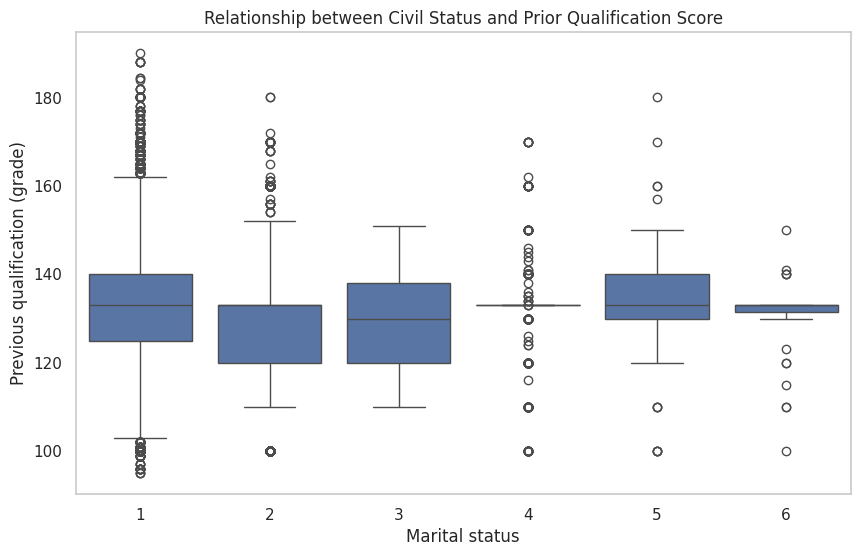

In [9]:
#4. Boxplot for Categorical Variables vs. Categorical Variables Numeric
# 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital status', y='Previous qualification (grade)', data=train_df)
plt.title('Relationship between Civil Status and Prior Qualification Score')
plt.grid(False)
plt.show()

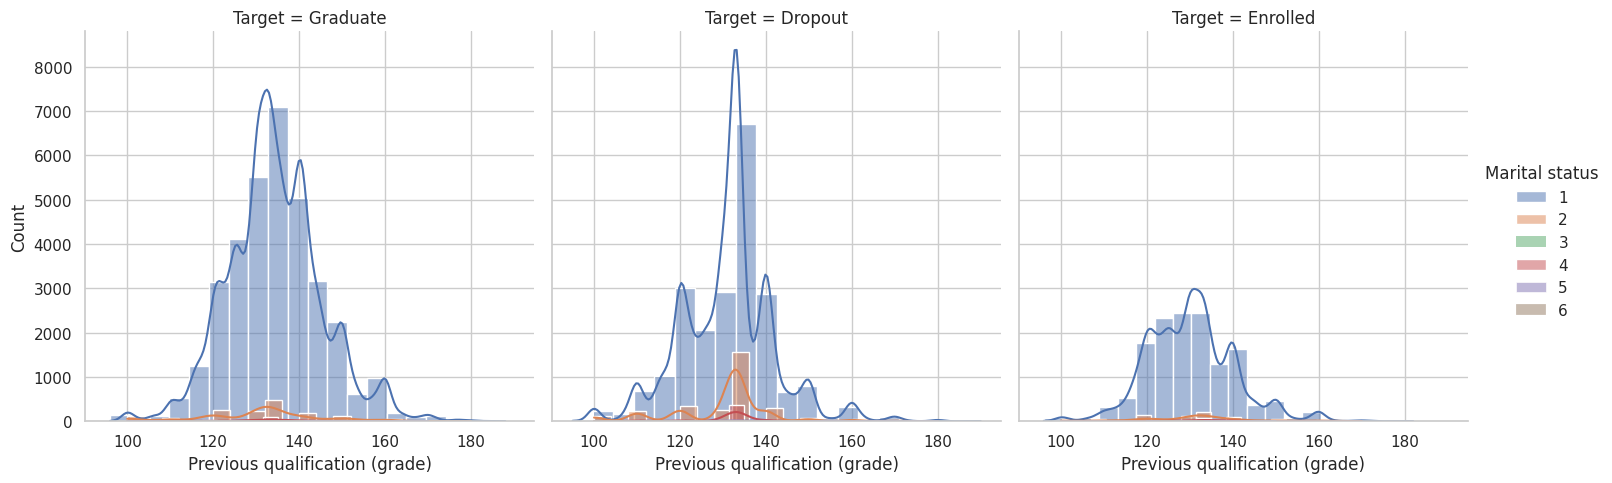

In [10]:
#6. FacetGrid for Multivariate Analysis
# Example: Numeric variable 'Previous qualification (grade)' and categorical variable 'Marital status'
g = sns.FacetGrid(train_df, col='Target', hue='Marital status', height=5)
g.map(sns.histplot, 'Previous qualification (grade)', kde=True, bins=20)
g.add_legend()

plt.show()

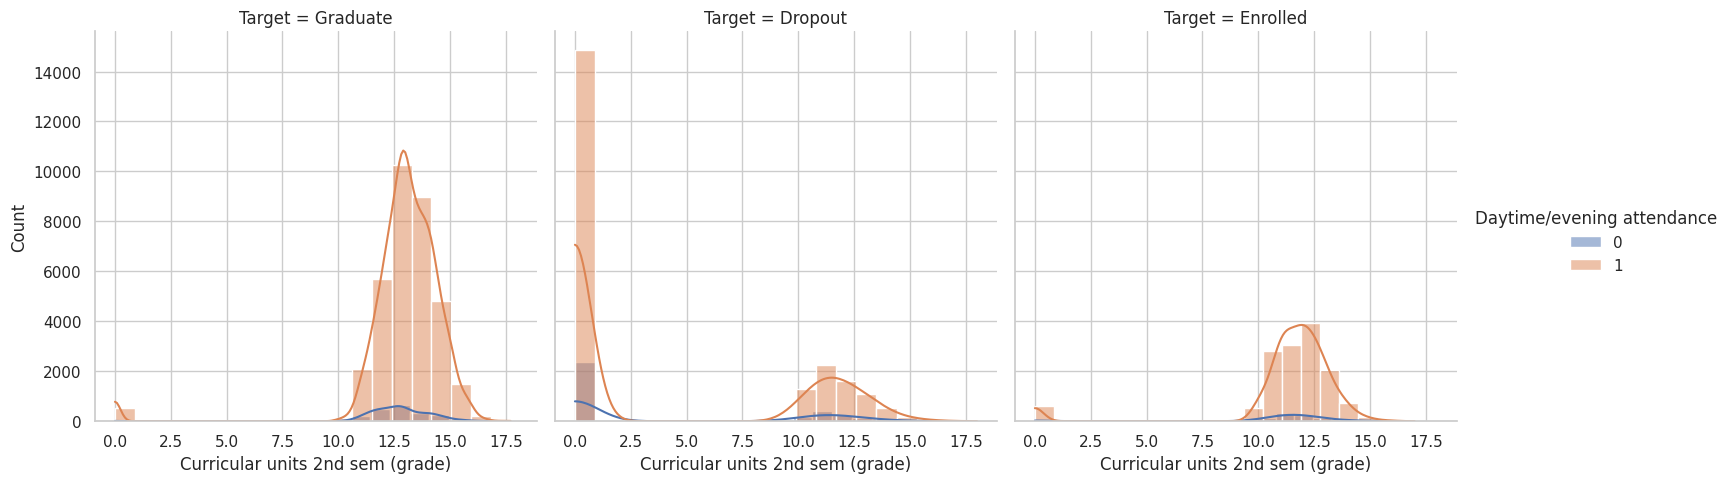

In [11]:
# FacetGrid for multivariate analysis with 'Curricular units 2nd without (grid)'
# 1 – daytime 0 - evening
g = sns.FacetGrid(train_df, col='Target', hue='Daytime/evening attendance', height=5)
g.map(sns.histplot, 'Curricular units 2nd sem (grade)', kde=True, bins=20)
g.add_legend()
plt.show()

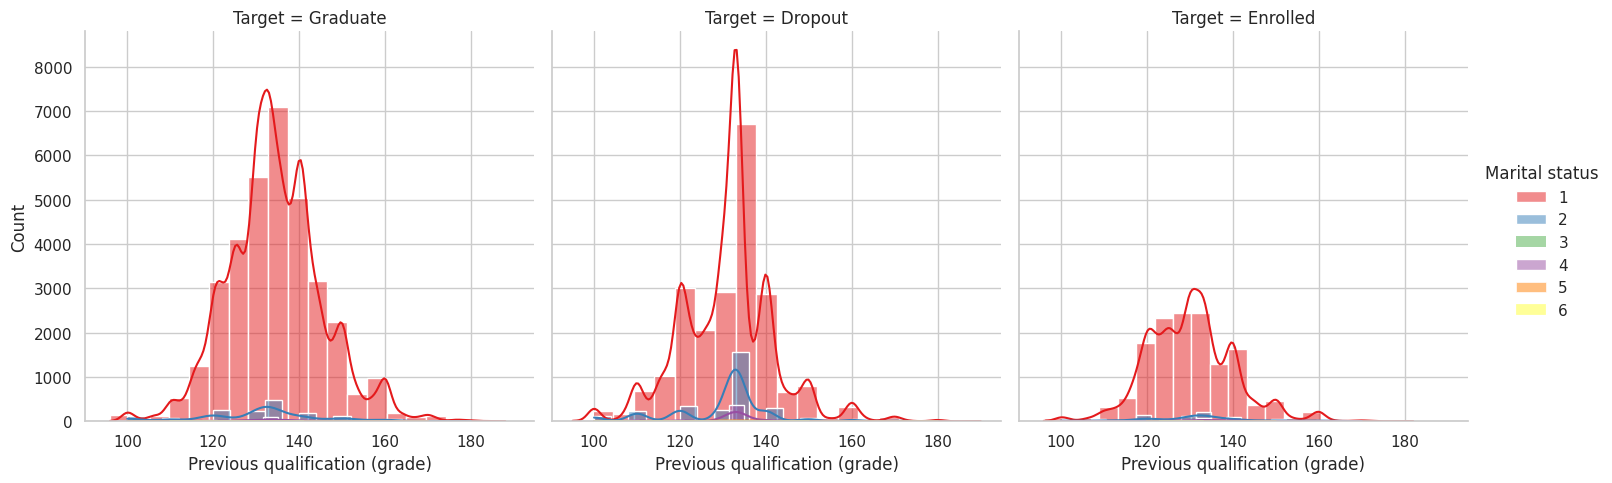

In [12]:
#5. FacetGrid for Multivariate Analysis with Color Palettes
# Example: Numeric variable 'Previous qualification (grade)' and categorical variable 'Marital status'
g = sns.FacetGrid(train_df, col='Target', hue='Marital status', height=5, palette='Set1')
g.map(sns.histplot, 'Previous qualification (grade)', kde=True, bins=20)
g.add_legend()
plt.show()

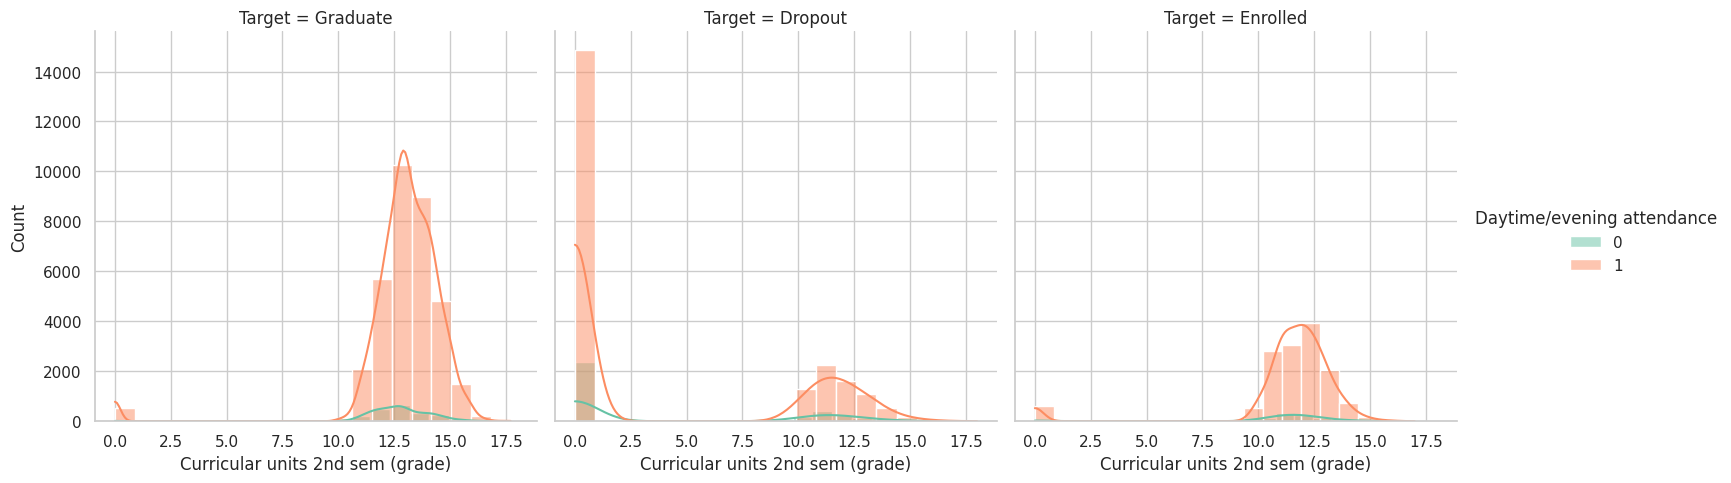

In [13]:
# FacetGrid para análise multivariada com 'Curricular units 2nd sem (grade)'
g = sns.FacetGrid(train_df, col='Target', hue='Daytime/evening attendance', height=5, palette='Set2')
g.map(sns.histplot, 'Curricular units 2nd sem (grade)', kde=True, bins=20)
g.add_legend()
plt.show()

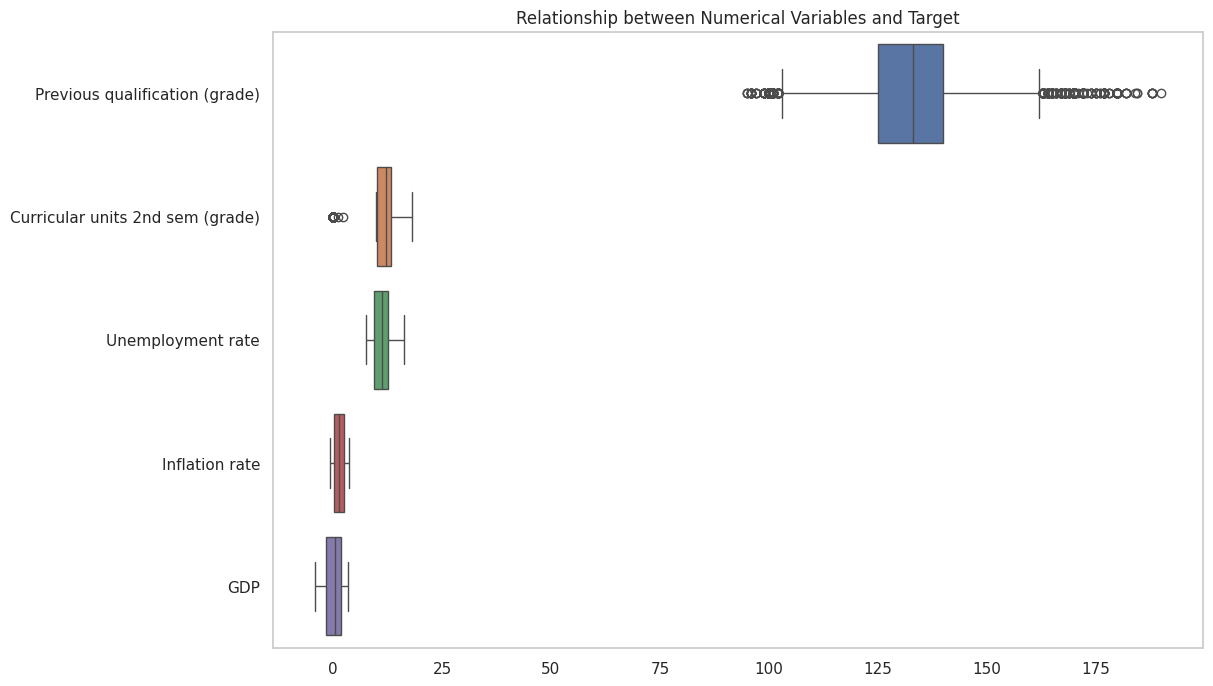

In [14]:
# 3. Analyze Distributions of Numerical Variables
numerical_features = ['Previous qualification (grade)',
                      'Curricular units 2nd sem (grade)',
                      'Unemployment rate',
                      'Inflation rate',
                      'GDP']

# 4. Analyze Distributions of Categorical Variables
categorical_features = ['Marital status',
                        'Application mode',
                        'Daytime/evening attendance',
                        'Nacionality',
                        'Mother\'s qualification']

# 6. Investigate Relationships Between Variables and the Target (Target)
# Relationship between numeric variables and Target
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df[numerical_features + ['Target']], orient="h")
plt.title('Relationship between Numerical Variables and Target')
plt.grid(False)
plt.show()

## Подготовка данных

In [15]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

Number of missing values ​​per column:
id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                   

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Target_2'] = label_encoder.fit_transform(train_df['Target'])

# Viewing
label_encoder

LabelEncoder()

In [17]:
# Rename the columns
train_df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
train_df.head()

,id,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,...,curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target,target_2
0,0,1,1,1,9238,1,1,126.0,1,1,...,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate,2


In [18]:
# Delete the 'Name' column, for example
train_df.drop(columns=['target'], inplace=True)
train_df

,id,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target_2
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,2
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,2
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,1
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,0


In [19]:
# Resources
X = train_df.drop(columns=['target_2'])

# Target variable
y = train_df['target_2']

## Обучение моделей
Мы будем использовать модели: KNN, Логистическую регрессию, Дерево решений, Ada Boost и градиентный бустинг

In [24]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to dummy variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
sk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (61214, 37)
Viewing rows and columns given y train (61214,)


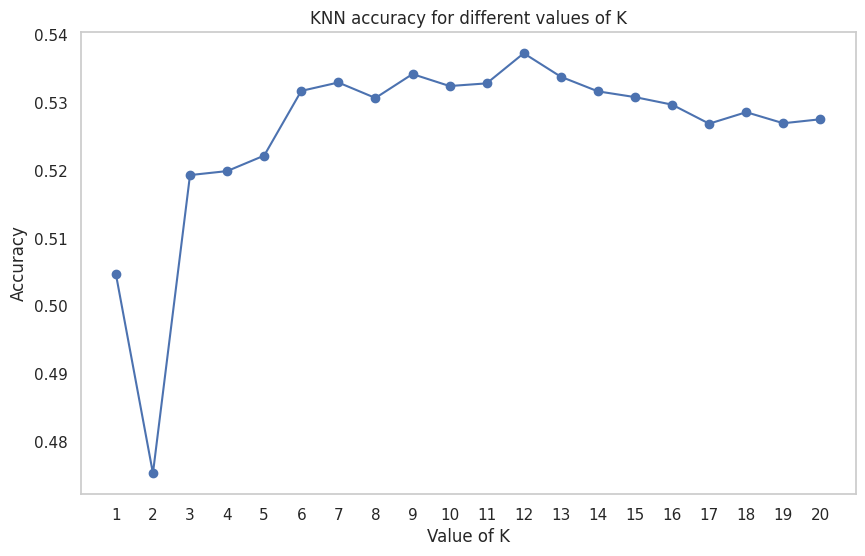

Best value of K: 12
Corresponding accuracy: 0.5373105070569786


In [28]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_cv = cross_val_score(knn, X,
                        y,
                        scoring='accuracy',
                        cv=sk,
                        n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn_cv.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = [

    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),

    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic regression model
    LogisticRegression(random_state=50),

    # Ada Boost Model
    AdaBoostClassifier(random_state=45),
]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

DecisionTreeClassifier(random_state=42)

Model 1: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.7409174072138003
-----------------
RandomForestClassifier(random_state=42)

Model 2: RandomForestClassifier

Training Accuracy: 0.9999673277354854
Testing Accuracy: 0.8278881338212232
-----------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

Model 3: LogisticRegression

Training Accuracy: 0.6965400071878982
Testing Accuracy: 0.6919759539989545
-----------------
AdaBoostClassifier(random_state=45)

Model 4: AdaBoostClassifier

Training Accuracy: 0.8190283268533342
Testing Accuracy: 0.8194589649764767
-----------------


Model 1: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.7409174072138003


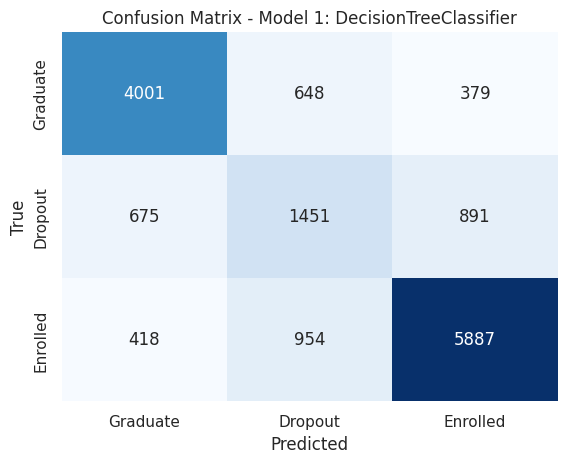

------------------
Model 2: RandomForestClassifier
Training Accuracy: 0.9999673277354854
Testing Accuracy: 0.8278881338212232


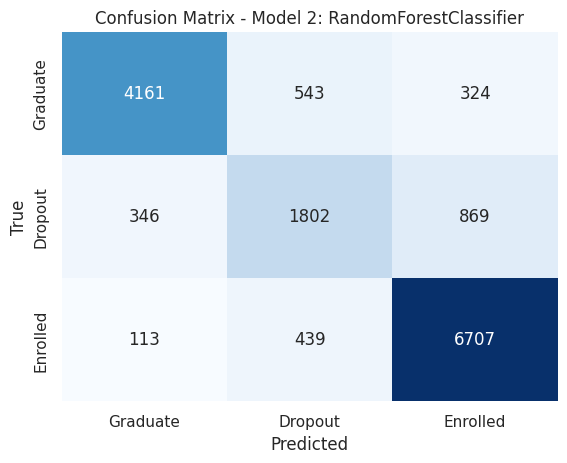

------------------
Model 3: LogisticRegression
Training Accuracy: 0.6965400071878982
Testing Accuracy: 0.6919759539989545


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


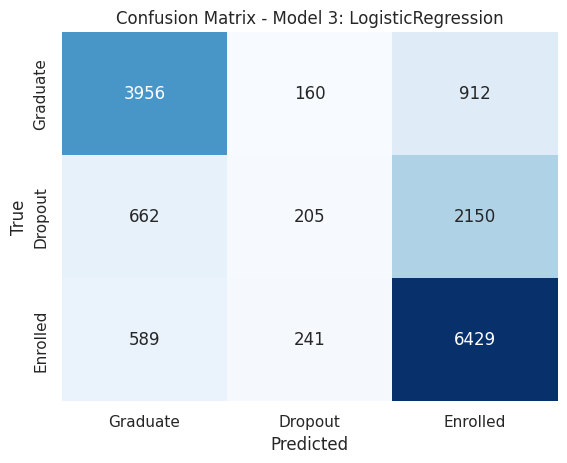

------------------
Model 4: AdaBoostClassifier
Training Accuracy: 0.8190283268533342
Testing Accuracy: 0.8194589649764767


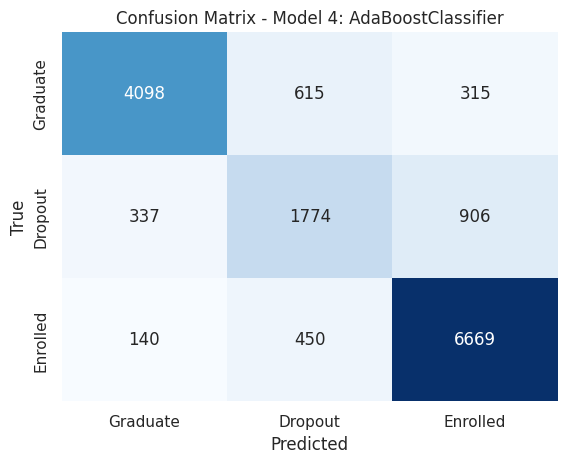

------------------


In [30]:

from sklearn.metrics import accuracy_score, confusion_matrix


for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Graduate", "Dropout", "Enrolled"],
                yticklabels=["Graduate", "Dropout", "Enrolled"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")